Este colab fue desarrollado por Arnold Charry Armero

# Job Scheduling Machines

En una planta de máquinas herramienta se deben realizar cinco trabajos
cada día. El tiempo que se tarda en realizar cada trabajo depende del
máquina utilizada para realizar el trabajo. Si se utiliza una máquina, hay
Se requiere un tiempo de preparación. Los tiempos relevantes se dan en
Tabla 20. El objetivo de la empresa es minimizar la suma de los
tiempos de preparación y operación de la máquina necesarios para completar todos los trabajos.

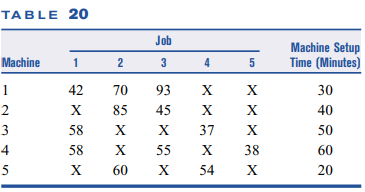

## Conjuntos

$ i = \text{Máquina indexada por } i$

$ j = \text{Trabajo indexado por } j$

## Parámetros

$ B_{ij} = \textrm{1 si la máquina } i \textrm{ puede realizar el trabajo }j, \textrm{0 lo contrario }$

$ T_{ij} = \textrm{Tiempo que la máquina } i \textrm{ utiliza para realizar el trabajo }j$

$ S_{i} = \textrm{Tiempo de alistamiento de la máquina } i $

## Variables de decisión

$ x_{ij} = \textrm{1 si la máquina } i \textrm{ va a realizar el trabajo }j, \textrm{0 lo contrario }$

$ y_{i} = \textrm{1 si se utiliza la máquina } i \textrm{, 0 lo contrario} $

## Función Objetivo

$$\textrm{Min } z = \sum_{j = 1}^{n}\sum_{i = 1}^{n} T_{ij} B_{ij}\: x_{i} + \sum_{i = 1}^{n} S_{i}\: y_{i}$$

## Restricciones

Sólo una máquina puede realizar un trabajo,

$$ \sum_{i = 1}^{n}x_{ij} = 1, \forall j $$

Si se utiliza la máquina, entonces se produce, de lo contrario no,

$$ \sum_{j = 1}^{n}x_{ij} B_{ij} \leq y_{i}, \forall i $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 21.1 MB/s eta 0:00:00


In [3]:
#Se importa la libreria
from pulp import *

In [2]:
#Conjuntos
maquinas = range(5)
trabajos = range(5)

In [7]:
#Parámetros

T = [[42, 70, 93, 0, 0],
     [0, 85, 45, 0, 0],
     [58, 0, 0, 37, 0],
     [58, 0, 55, 0, 38],
     [0, 60, 0, 54, 0]]

B = []

for i in maquinas:
  B.append([])
  for j in trabajos:
    if T[i][j] != 0:
      B[i].append(1)
    else:
      B[i].append(0)

#Matriz B
print("----Matriz B----")
for i in range(5):
  for j in range(5):
    print(B[i][j], end = "  " if B[i][j] >= 0 and B[i][j] < 10 else " ")
  print("")

S = [30, 40, 50, 60, 20]

----Matriz B----
1  1  1  0  0  
0  1  1  0  0  
1  0  0  1  0  
1  0  1  0  1  
0  1  0  1  0  


In [17]:
# Crear la instancia del modelo
model = LpProblem(name="Job_Sheduling_Machines", sense=LpMinimize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (maquinas, trabajos), 0, 1, LpInteger)
Y = LpVariable.dicts("Y", (maquinas), 0, 1, LpInteger)

# Función objetivo
model += lpSum([[T[i][j] * X[i][j] for i in maquinas] for j in trabajos]) + lpSum([S[i] * Y[i] for i in maquinas])


# Agregar las restricciones

for j in trabajos:
  model += lpSum([X[i][j] * B[i][j] for i in maquinas]) == 1

for i in maquinas:
  model += lpSum([X[i][j] * B[i][j] for j in trabajos]) <= Y[i]


# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Tiempo total = ", value(model.objective))

Status: Optimal
X_0_0 = 1.0
X_0_1 = 0.0
X_0_2 = 0.0
X_1_1 = 0.0
X_1_2 = 1.0
X_2_0 = 0.0
X_2_3 = 1.0
X_3_0 = 0.0
X_3_2 = 0.0
X_3_4 = 1.0
X_4_1 = 1.0
X_4_3 = 0.0
Y_0 = 1.0
Y_1 = 1.0
Y_2 = 1.0
Y_3 = 1.0
Y_4 = 1.0
Tiempo total =  422.0
